In [3]:
%matplotlib nbagg
from __future__ import division
from scipy.stats import norm
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: Linear Regression (10 marks) 

The data listed below come from an experiment to verify Ohm's law. The voltage across a resistor (the dependent variable) was measured as a function of the current flowing (the independent variable).  The precision of the voltmeter was 0.01mV, and the uncertainty in the current was negligible.

\begin{equation}
\begin{array}{lccccc}
\hline
{\rm Current~(\mu A)} &10&20&30&40&50\\
{\rm Voltage~(mV)} &0.98&1.98&2.98&3.97&4.95\\
\hline
{\rm Current~(\mu A)} &60&70&80&90&\\
{\rm Voltage~(mV)} &5.95&6.93&7.93&8.91&\\
\hline
\end{array} 
\end{equation}

This data is saved as 'ohms_law.csv'

Required:
<bf>
>(i) Calculate the unweighted best-fit gradient and intercept, and their uncertainties. (2 marks) 
<bf>
>(ii) Calculate the common uncertainty, $\alpha_{\rm CU}$, and compare the value with the experimental uncertainty. (2 marks) 
<bf>
>(iii) Plot a graph of the data and add the best-fit straight line. Remember to label your axes. (4 marks) 
<bf>
>(iv) Calculate the residuals, and comment on their magnitudes. (2 marks) 

### (i) Calculate the unweighted best-fit gradient and intercept, and their uncertainties.

In [4]:
data = pd.read_csv('ohms_law.csv')
current = np.array(data.iloc[:,0])
voltage = np.array(data.iloc[:,1])
voltage_error = data.iloc[:,2]

def linear(x,m,c):
    return x*m + c

def one_i():
    gradient = 0
    intercept = 0
    uncertainty_gradient = 0
    uncertainty_intercept = 0
    popt, pcov = curve_fit(linear, current, voltage)
    gradient = popt[0]
    intercept = popt[1]
    uncertainty_gradient = pcov[0,0]**0.5
    uncertainty_intercept = pcov[1,1]**0.5
    # YOUR CODE HERE
    return(gradient,intercept,uncertainty_gradient,uncertainty_intercept)

print(one_i())

(0.0990833333313682, -0.0008333333355163841, 9.236442385408873e-05, 0.005197641422796618)


In [5]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [6]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [7]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [8]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (ii) Calculate the common uncertainty (inside the function) and compare with the experimental uncertainty (by typing your comparison in the markdown cell below the function). You must return your answer in micro volts.

In [9]:
data = pd.read_csv('ohms_law.csv')
current = np.array(data.iloc[:,0])
voltage = np.array(data.iloc[:,1])
voltage_error = data.iloc[:,2]

def one_ii():
    # YOUR CODE HERE
    N = len(current)
    m, c,_,_ = one_i()
    total = 0
    for i in range(len(current)):
        total += (voltage[i] - m * current[i] - c) ** 2
    common_uncertainty = np.sqrt(1 / (N - 2) * total)
    common_uncertainty *= 1e3
    return(common_uncertainty)

print(one_ii())

7.154752000627042


Comparing with the experimental uncertainty, the common uncertainty is close to the uncertainty caused by the voltmeter.

### (iii) Plot a graph of the data adding the best fit line and residuals below.

0.0990833333313682
-0.0008333333355234895


<IPython.core.display.Javascript object>


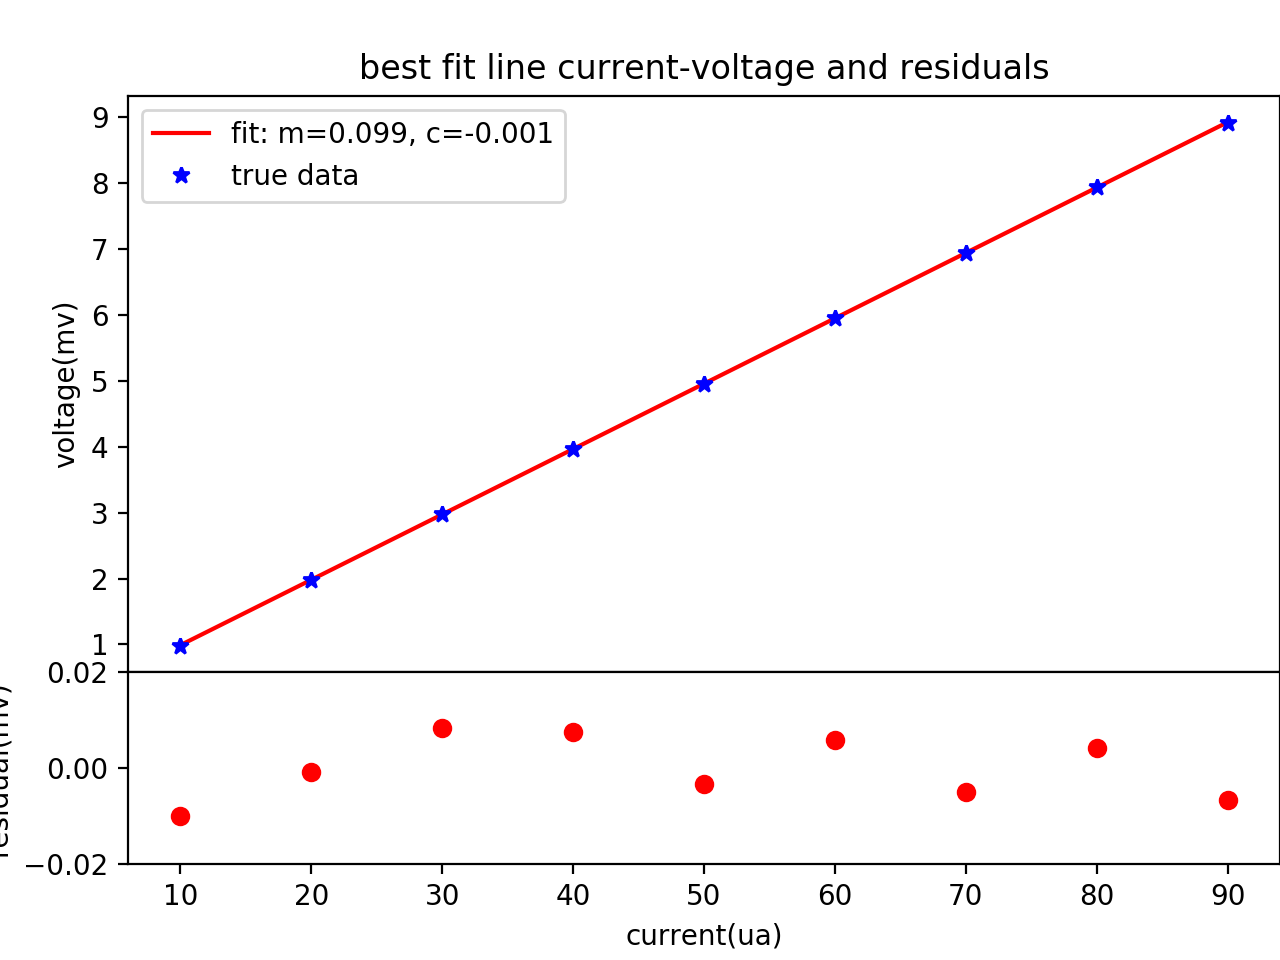

(-0.02, 0.02)

In [10]:
gradient = 0
intercept = 0
uncertainty_gradient = 0
uncertainty_intercept = 0
popt, pcov = curve_fit(linear, current, voltage, sigma = voltage_error)
print(popt[0])
print(popt[1])
gradient = popt[0]
intercept = popt[1]
ys_pred = []
for x in current:
    ys_pred.append(gradient * x + intercept)
residuals = []
for i in range(len(voltage)):
    residuals.append(voltage[i] - ys_pred[i])
fig = plt.figure()
frame1 = fig.add_axes((.1,.3,.9,.6))
plt.plot(current, ys_pred, 'r-', label='fit: m=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(current, voltage, 'b*', label='true data')
plt.xlabel("current(ua)")
plt.ylabel("voltage(mv)")
plt.title("best fit line current-voltage and residuals")
plt.legend()
frame2 = fig.add_axes((.1,.1,.9,.2))
plt.plot(current, residuals, 'ro')
plt.xlabel("current(ua)")
plt.ylabel("residual(mv)")
plt.ylim(-0.02, 0.02)

### (iv) Comment on the magnitude of the residuals.

The residuals have a mean of zero and show no obivious structure. Maybe with more and more points, the residual value can plot a Gaussian distribution histogram.

## Question 2: Does the noise on a photo-diode signal follow a Gaussian distribution? (10 marks) 

As we discussed in Chapter 1, for very low intensities the distribution of counts from a photo-detector is expected to follow the  Poisson shot-noise distribution.  However, for larger photon fluxes the noise on the voltage generated in a photo-diode circuit is expected to follow a Gaussian distribution.  

![title](photodiode.JPG)
The above figure shows the signal output from a photo-diode as a function of time, and in part (b)  a histogram of the distribution of data.  The number of observed data points lying within specified bands, $O_i$, is given below.

\begin{equation}
\begin{array}{lccc}
\hline
\mbox{Interval/$\sigma$} &(-\infty,-2.5)&(-2.5, -2)&(-2, -1.5)\\
O &9&48&142\\
\hline
\mbox{Interval/$\sigma$} &(-1.5, -1)&(-1, -0.5)&(-0.5, 0)\\
O &154&438&521\\
\hline
\mbox{Interval/$\sigma$} &(0, 0.5)&(0.5, 1)&(1, 1.5)\\
O &405&318&299\\
\hline
\mbox{Interval/$\sigma$} &(1.5, 2)&(2, 2.5)&(2.5, \infty)\\
O &100&57&9\\
\hline
\end{array} 
\end{equation}

Required:

>(i) Use the equation,

\begin{equation}
P(x_1 \leq x \leq x_2) = \frac{1}{\sigma\sqrt{2\pi}}\int_{x_1}^{x_2}exp(-\frac{(x-\bar{x})^2}{2\sigma^2})dx
\end{equation}

>to determine the  number of data points expected in each interval, $E_i$. You must give your answer to 4 decimal places (2 marks) 

<bf>
(ii) Show that $E_i>5$ for all bins, and state why there is no need to combine sequential bins. (2 marks) 
<bf>
(iii) Calculate $\chi^2$ from the formula (2 marks) 
    
$\displaystyle{\chi ^2  = \sum\limits_{i=1}^{12} {{{\left( {O_i  - E_i } \right)^2 } \over {E_i }}}}$.

<bf>
(iv) Calculate the number of degrees of freedom. (2 marks) 
<bf>
(v) Given the answers you found in (iii) and (iv), are the data consistent with the hypothesis of a Gaussian distribution? (2 marks) 

### (i) Determine the number of data points expected in each interval, $E_i$. You must give your answer to 4 decimal places

In [11]:
def two_i():
    intervals = [-1000000000,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,10000000000]
    expected_possibility = []
    for i in range(len(intervals) - 1):
        expected_possibility.append(norm.cdf(intervals[i + 1]) - norm.cdf(intervals[i])) 
    total = 9 + 48 + 142 + 154 + 438 + 521 + 405 + 318 + 299 + 100 + 57 + 9
    expected_points = []
    for i in range(len(expected_possibility)):
        expected_points.append(expected_possibility[i] * total)
    # YOUR CODE HERE
    return(expected_points)

print(two_i())

[15.524163314440331, 41.351166556007655, 110.14267330169719, 229.6201316564975, 374.7057119863245, 478.6561531850328, 478.6561531850328, 374.7057119863245, 229.62013165649748, 110.14267330169719, 41.35116655600763, 15.524163314440397]


In [12]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (ii) Is $E_i > 5$ for all bins? State why there is no need to combine sequential bins.

Yes, for all the bins, E_i > 5, $\frac{\left(O_{i}-E_{i}\right)^{2}}{E_{i}}$ has E_i as its denominator, if E_i is too small, the chi2 will be too large and it will be hard to use for detecting whether the model is good or not. So we need to keep E_i more than 5. Since all the bins are more than 5, there is no need to combine sequential bins.

### (iii) Calculate  $\chi^2$.

In [13]:
def two_iii():
    # YOUR CODE HERE
    observed_points = [9, 48, 142, 154, 438, 521, 405, 318, 299, 100, 57, 9]
    expected_points = two_i()
    chi2 = 0
    for i in range(len(observed_points)):
        chi2 += (observed_points[i] - expected_points[i]) ** 2 / expected_points[i]
    return(chi2)

print(two_iii())

102.84329322658839


In [14]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iv) What is the number of degrees of freedom?

In [15]:
def two_iv():
    # YOUR CODE HERE
    n = 12
    N = 3
    degrees_of_freedom = n - N
    return(degrees_of_freedom)

print(two_iv())

9


In [16]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (v) Given the answers you found in (iii) and (iv), are the data consistent with the hypothesis of a Gaussian distribution?

$\chi_{\nu}^{2}=\frac{\chi_{\min }^{2}}{\nu}$=11.427032580732043 >> 1, so according to the principle, it s not a good hypothesis using Gaussian distribution model.

## Question 3: Benford's Law of Anomalous Numbers (10 marks)

It has been observed that the first pages of a table of common logarithms
show more wear than do the last pages, indicating that more used numbers begin with the digit 1 than with the digit 9. (F. Benford, Proceedings of the American Philosophical Society, 78,  March 1938).  The Law can be stated that the probability of obtaining a first digit $a$ is equal to $\log_{10}\left(1+1/a\right)$.

![title](benford_table.JPG)

Table 1 shows some of the data sets analysed by Benford, of which is saved as 'benford.csv'.

Let's consider the rivers row.

Required:
<bf>
>(i) Use Benford's Law to calculate the probability of obtaining a first digit of $a$, for $1\leq a \leq9$. (2 marks) 
<bf>
>(ii) Using Benford's formula and the total count for that group, calculate the expected number of occurrences of the first digit being $a$, $E_{a}$, for $1\leq a \leq9$.   (2 marks) 
<bf>
>(iii) Ascertain whether some of the bins should be combined.  (1 mark) 
<bf>
>(iv) From the table, and the total count for that group, calculate the observed number of occurrences of the first digit being $a$, $O_{a}$, for $1\leq a \leq9$. (2 mark) 
<bf>
>(v)  Calculate $\chi^2$ and the number of degrees of freedom.  (1 mark)
<bf>
>(vi) Test the hypothesis that the distribution for that group follows Benford's Law. (2 marks) 

### (i) Use Benford's Law to calculate the probability of obtaining a first digit of $a$, for $1\leq a \leq9$. 

In [17]:
def three_i():
    '''Your function must return an array of all the probabilities from a=1 to a=9'''
    aa = [i + 1 for i in range(9)]
    probability = []
    for a in aa:
        probability.append(np.log10(1 + 1 / a))
    
    # YOUR CODE HERE
    return(probability)

print(three_i())

[0.3010299956639812, 0.17609125905568124, 0.12493873660829992, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]


In [18]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (ii) Using Benford's formula and the total count for that group, calculate the expected number of occurrences of the first digit being $a$, $E_{a}$, for $1\leq a \leq9$.  

In [19]:
def three_ii():
    total = 335
    probabilitys = three_i()
    expected_occurances = []
    for probability in probabilitys:
        expected_occurances.append(total * probability)
    
    # YOUR CODE HERE
    return(expected_occurances)

print(three_ii())

[100.8450485474337, 58.990571783653216, 41.854476763780475, 32.464854357698904, 26.525717425954316, 22.427174526255428, 19.427302237525055, 17.136095019872734, 15.328759337826172]


In [20]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iii) Ascertain whether some of the bins should be combined.

None of the bins need to be combined, since for all of the bins, E_i is over 5.

### (iv) From the table, and the total count for that group, calculate the observed number of occurrences of the first digit being $a$, $O_{a}$, for $1\leq a \leq9$. 

In [22]:
def three_iv():
    '''Your function must return an array of occurances from a = 1 to a = 9'''
    observed_probability = [0.31, 0.164, 0.107, 0.113, 0.072, 0.086, 0.055, 0.042, 0.051]
    observed_occurances = []
    total = 335
    for p in observed_probability:
        observed_occurances.append(np.round(p * total))
    # YOUR CODE HERE
    return(observed_occurances)

print(three_iv())

[104.0, 55.0, 36.0, 38.0, 24.0, 29.0, 18.0, 14.0, 17.0]


In [44]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (v)  Calculate $\chi^2$ and the number of degrees of freedom.  

In [45]:
def three_v():
    '''Your function must return the chi^2 value and the degrees of freedom'''
    # YOUR CODE HERE
    n = 1
    N = 9
    expected_occurances = three_ii()
    observed_occurances = three_iv()
    degrees_of_freedom = N - n
    chi2 = 0
    for i in range(len(expected_occurances)):
        chi2 += (observed_occurances[i] - expected_occurances[i]) ** 2 / expected_occurances[i]
    return(chi2,degrees_of_freedom)

print(three_v())

(5.159115592265763, 8)


In [24]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [25]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (vi) Test the hypothesis that the distribution for that group follows Benford's Law and make appropiate comments.

$X\left(\chi^{2} ; v\right)=\frac{\left(\chi^{2}\right)^{\left(\frac{v}{2}-1\right)} \exp \left[-\chi^{2} / 2\right]}{2^{v / 2} \Gamma(v / 2)}$

$P\left(\chi_{\min }^{2} \leq \chi^{2} \leq \infty ; v\right)=\int_{\chi_{\min }^{2}}^{\infty} X\left(\chi^{2} ; v\right) \mathrm{d} \chi^{2}$

For the degrees of fredom equals to 8, so

$X\left(\chi^{2} ; 8\right)$ = 0.11

$P\left(\chi_{\min }^{2} \leq \chi^{2} \leq \infty ; v\right)=\int_{\chi_{\min }^{2}}^{\infty} X\left(\chi^{2} ; 8\right) \mathrm{d} \chi^{2}$ = 0.74

Also, $\chi_{\nu}^{2}=\frac{\chi_{\min }^{2}}{\nu}$ = 0.64

So, it s a good fit, because $\chi_{\nu}^{2} \approx 1$ and $P\left(\chi_{\min }^{2} ; \nu\right) \approx 0.5$

The process of calculation is following below:

In [49]:
chi2, degrees_of_freedom = three_v()
answer = chi2 ** (degrees_of_freedom / 2 - 1) * np.exp(-1 * chi2 / 2) / (2 ** (degrees_of_freedom / 2) * 6)
print(answer)

0.10843433639370458


In [50]:
from scipy.integrate import quad
def chi2_solve(chi2, degrees_of_freedom):
    return chi2 ** (degrees_of_freedom / 2 - 1) * np.exp(-1 * chi2 / 2) / (2 ** (degrees_of_freedom / 2) * 6)
value, err = quad(chi2_solve, chi2, np.inf, degrees_of_freedom)
print(value)

0.7404421727734498


In [51]:
chi2,degrees_of_freedom = three_v()
print(chi2 / degrees_of_freedom)

0.6448894490332204


## Question 4: Analysing Bevington's data (10 marks) 

In this question we will analyse the data from Table~8.1 in P.R. Bevington's book 'Data reduction and error analysis'.

The data can be obtained from the file BevingtonData.csv. There are two columns: time, and number of counts detected.

The experiment involves irradiating a coin with thermal neutrons to create two short-lived silver isotopes that subsequently decay by beta emission.  Students count the emitted beta particles in 15s intervals for approximately 4 minutes.

The model to describe the data has five parameters:  a background, $a_1$; amplitudes of two excited states, $a_2$ and $a_3$, respectively;
the mean lives of the excited states, $a_4$ and $a_5$, respectively. Mathematically, we can represent the decay by the fitting function:
\begin{equation}
y=a_1+a_2{\rm e}^{-t/a_4}+a_3{\rm e}^{-t/a_5}.
\end{equation}

Required:

>(i) What are the count errors? (2 marks)
<bf>
>(ii) Perform a fit to find the parameters (with their errors) (4 marks) 
<bf>
>(iii) What is the reduced $\chi^2$ value? (2 marks) 
<bf>
>(iv) Plot an appropriate graph (i.e. counts versus time, with residuals) (2 marks) 


### (i) What are the count errors?

In [52]:
data = pd.read_csv('BevingtonData.csv')
time = np.array(data.iloc[:,0])
count = np.array(data.iloc[:,1])

def count_errors():
    '''Your function should return an array of the errors on each of the counts.'''
    errors = []
    for num in count:
        errors.append(np.sqrt(num))
    # YOUR CODE HERE
    return(errors)

print(count_errors())

[27.83882181415011, 21.88606862823929, 19.493588689617926, 17.378147196982766, 13.601470508735444, 12.529964086141668, 11.704699910719626, 10.908712114635714, 10.488088481701515, 9.433981132056603, 8.602325267042627, 7.810249675906654, 8.12403840463596, 8.246211251235321, 6.928203230275509, 7.3484692283495345, 7.14142842854285, 6.782329983125268, 7.416198487095663, 5.385164807134504, 5.291502622129181, 6.082762530298219, 7.0, 5.0990195135927845, 5.916079783099616, 5.385164807134504, 5.5677643628300215, 4.898979485566356, 5.0, 5.916079783099616, 4.898979485566356, 5.477225575051661, 5.0990195135927845, 5.291502622129181, 4.58257569495584, 4.242640687119285, 4.47213595499958, 5.196152422706632, 4.123105625617661, 4.123105625617661, 3.7416573867739413, 4.123105625617661, 4.898979485566356, 3.3166247903554, 4.69041575982343, 4.123105625617661, 3.4641016151377544, 3.1622776601683795, 3.605551275463989, 4.0, 3.0, 3.0, 3.7416573867739413, 4.58257569495584, 4.123105625617661, 3.605551275463989

In [53]:
'''TEST CELL- DO NOT DELETE'''
assert len(count_errors()) == 59, 'Please make sure that your function returns an array of length 59.' 

In [54]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (ii) Perform a fit using the fitting function f defined in the cell below. What are the best-fit parameters for a1, ..., a5 along with their errors?

In [55]:
data = pd.read_csv('BevingtonData.csv')
time = np.array(data.iloc[:,0])
count = np.array(data.iloc[:,1])

def f(time, a1, a2, a3, a4, a5):
    return a1 + a2*np.exp(-time/a4) + a3*np.exp(-time/a5)

def best_fit_line():
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    a5 = 0
    error_a1 = 0
    error_a2 = 0
    error_a3 = 0
    error_a4 = 0
    error_a5 = 0
    errors = count_errors()
    popt, pcov = curve_fit(f, xdata = time, ydata = count, sigma = errors, p0 = [11, 930, 100, 30, 200])
    a1 = popt[0]
    a2 = popt[1]
    a3 = popt[2]
    a4 = popt[3]
    a5 = popt[4]
    error_a1 = pcov[0][0] ** 0.5
    error_a2 = pcov[1][1] ** 0.5
    error_a3 = pcov[2][2] ** 0.5
    error_a4 = pcov[3][3] ** 0.5
    error_a5 = pcov[4][4] ** 0.5
    # YOUR CODE HERE
    return(a1,a2,a3,a4,a5,error_a1,error_a2,error_a3,error_a4,error_a5)

print(best_fit_line())


(10.134140601876235, 957.7711153388628, 128.28177316987416, 34.2442067676362, 209.68988059482038, 2.100692465768677, 54.77994188434144, 23.440771648769907, 2.788361413937251, 35.13891273408218)


In [56]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [57]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [58]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [59]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [60]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [61]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [62]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [63]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [64]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [65]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iii) What is the reduced $\chi^2$ value?

In [66]:
def reduced_chi_squared():
    reduced_chi_squared = 0
    errors = count_errors()
    N = len(errors)
    n = 5
    degrees_of_freedom = N - n
    chi2 = 0
    a1,a2,a3,a4,a5,_,_,_,_,_ = best_fit_line()
    for i in range(len(time)):
        chi2 += (f(time[i], a1, a2, a3, a4, a5) - count[i]) ** 2 / errors[i] ** 2
    reduced_chi_squared = chi2 / degrees_of_freedom
    # YOUR CODE HERE
    return(reduced_chi_squared)
print(reduced_chi_squared())

1.223676361281971


In [67]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iv) Plot a suitable graph. This is, counts versus time, with residuals.

<IPython.core.display.Javascript object>


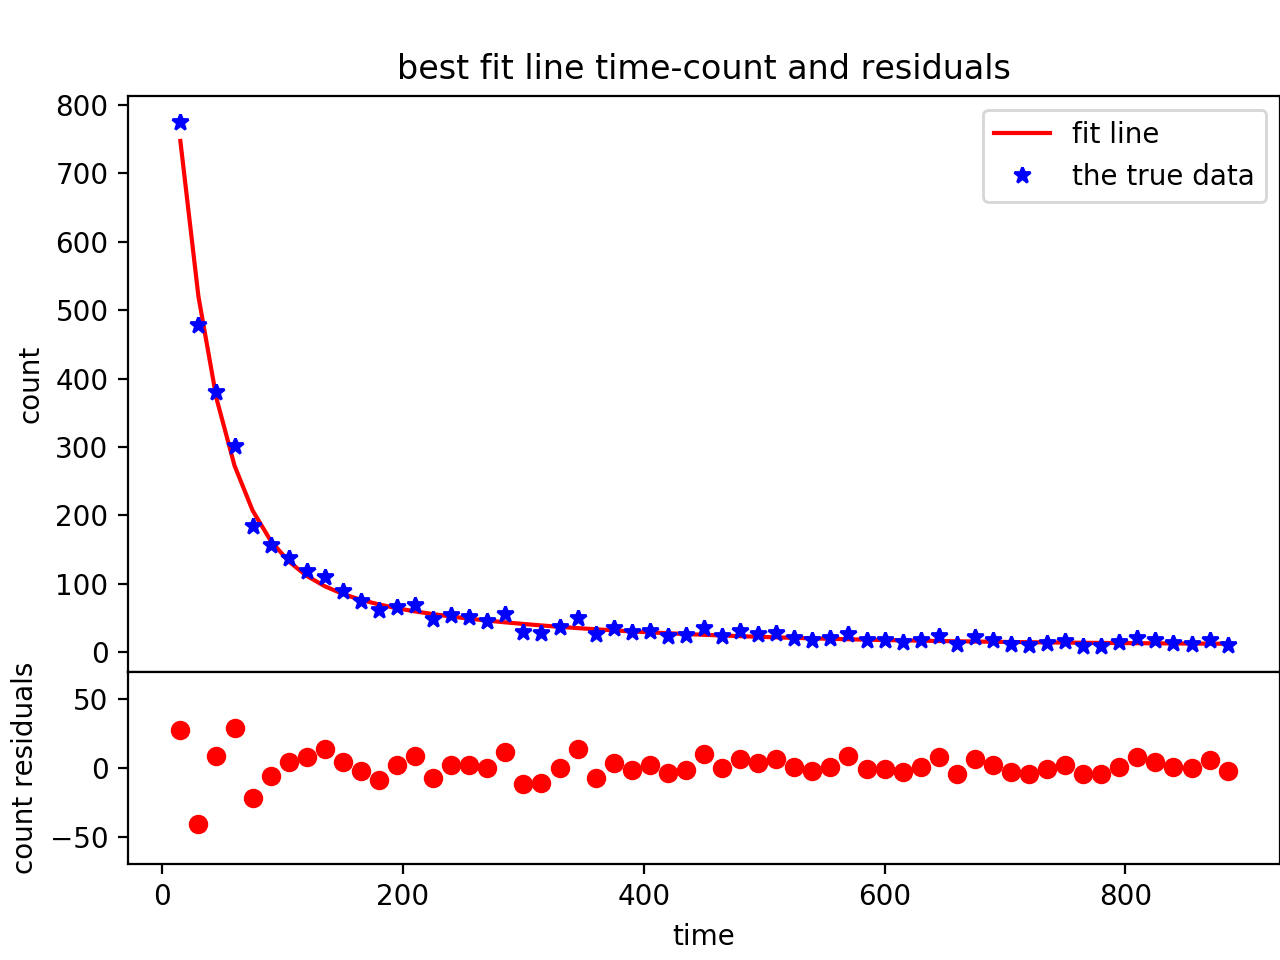

In [88]:
# YOUR CODE HERE
a1,a2,a3,a4,a5,_,_,_,_,_ = best_fit_line()
count_pred = []
for t in time:
    count_pred.append(f(t, a1, a2, a3, a4, a5))
residuals = []
for i in range(len(count_pred)):
    residuals.append(count[i] - count_pred[i])

fig = plt.figure()
frame1 = fig.add_axes((.1,.3,.9,.6))
plt.plot(time, count_pred, 'r-', label='fit line')
plt.plot(time, count, 'b*', label='the true data')
plt.xlabel("time")
plt.ylabel("count")
plt.title("best fit line time-count and residuals")
plt.legend()
frame2 = fig.add_axes((.1,.1,.9,.2))
plt.xlabel("time")
plt.ylabel("count residuals")
plt.ylim(-70, 70)
plt.plot(time, residuals, 'ro')